In [1]:
# Importo todo de qiskit
from qiskit import *

In [7]:
# Creo un registro cuántico de 2 cubits
qr = QuantumRegister(2)

In [8]:
# Creo un registro clásico de 2 bits para tomar medidas de los cubits
cr = ClassicalRegister(2)

In [9]:
# Creamos un circuito utilizando ambos Registros:
qc = QuantumCircuit(qr, cr)

In [10]:
# Para poder ver nuestros dibujos
%matplotlib inline      

#Dibujamos el circuito cuántico
qc.draw()

q1_0: 
      
q1_1: 
      
c1: 2/

In [11]:
# Creo una puerta de Hadamard en el cubit q0_0
qc.h(qr[0])

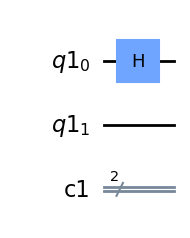

In [12]:
# Dibujamos el circuito usando MatPlotLib:
qc.draw(output='mpl')

In [13]:
# Creamos la operación: 'X controlada' 
#    Es como un if: if esto then otro
#       qc.cx(control_operacion (qr[0]), objetivo_operación (qr[1]))
qc.cx(qr[0], qr[1])

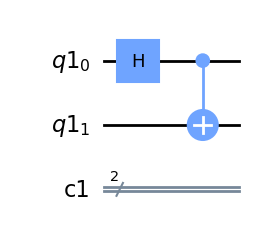

In [14]:
qc.draw(output='mpl')

In [15]:
# MEDIMOS los cubits del qr y GUARDAMOS en cr
qc.measure(qr, cr)

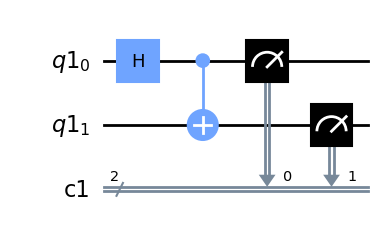

In [16]:
qc.draw(output='mpl')

In [17]:
# Importo el simulador de Qiskit:
simulador = Aer.get_backend('qasm_simulator')

In [18]:
#Ejecutamos el circuito y cogemos sus resultados:
resultados = execute(qc, backend = simulador).result()

In [19]:
# Importamos las herramientas de visualización de qiskit
from qiskit.tools.visualization import plot_histogram

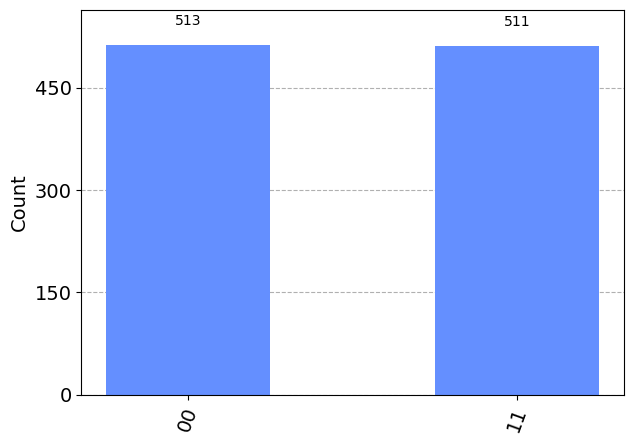

In [20]:
# Mostramos el resultado del circuito
plot_histogram(resultados.get_counts(qc))
    # Debe de dar una 50% a 00 y otro 50% a 11 (aprox.)

In [21]:
# Cargar las credenciales guardadas:
#from qiskit_ibm_runtime import QiskitRuntimeService
#service = QiskitRuntimeService()

In [22]:
from qiskit_ibm_provider import IBMProvider

# Cargo las credenciales guardadas:
provider = IBMProvider()

# Selecciono un proveedor 
provider = IBMProvider(instance="ibm-q/open/main")

In [ ]:
# Ordenador cuantico con el que vamos a trabajar
backend = provider.get_backend('ibm_nairobi')

In [ ]:
# Ejecutamos el circuito en el ordenador ibm_lagos
job = backend.run(qc)

In [ ]:
# Importamos job_monitor de qiskit
from qiskit.tools.monitor import job_monitor

In [ ]:
# Miramos el estado del job enviado al ordenador ibm_lagos
job_monitor(job)

In [ ]:
# Obtenemos el resultado
result = job.result()

In [ ]:
# Mostramos el resultado final 
plot_histogram(result.get_counts(qc))
    # El simulador obtiene el resultado de un ordenador cuántico ideal
    # Pero en la realidad no siempre se consigue 00 y 11 sino también 01 10